# Interpolación polinómica en dos variables

Autor: Pedro González Rodelas

Fecha de la primera versión: 12/05/2022

Sucesivas revisiones:   16,18,22/05/2022

Fecha de la última revisión: 24/05/2022

Se trata de usar como *espacio interpolador* uno formado por **funciones polinómicas** de grado bajo.

Hemos de notar que ahora se puede hablar de **grado total**,
como suma de los grados de las variables, y de **grado
parcial** para cada variable; así, el monomio $x^{2}y^{3}$ tiene grado total $5$, mientras que los grados en las variables $x$ e $y$ son $2$ y $3$, respectivamente.

Por tanto, **en dos variables**, los espacios polinómicos de grado
total más bajos son $\mathbb{P}_{0}\left(  x,y\right)  $, de grado total
$0$ y generado por $1$; $\mathbb{P}_{1}\left(  x,y\right)  $, de grado total
$1$ y generado por $1$, $x$ e $y$; $\mathbb{P}_{2}\left(  x,y\right)  $, de
grado total $2$ y generado por $1$, $x$, $y$, $x^{2}$, $xy$ e $y^{2}$, etc. En general, el espacio de
los polinomios en las variables $x$ e $y$ de grado total $n$, $\mathbb{P}%
_{n}\left(  x,y\right)  $, está generado por los polinomios $x^{r}y^{s}$,
$r+s\preceq n$.

Evidentemente, $\dim\mathbb{P}_{0}=1$, $\dim\mathbb{P}_{1}=3$ y $\dim
\mathbb{P}_{2}=6$ y es fácil probar que $\dim\mathbb{P}_{n}=\frac{1}{2}\left(  n+1\right)  \left(  n+2\right)  $.

Vemos pues como entre cada dos dimensiones existen muchos valores
que no corresponden a ninguna dimensión; por ejemplo, no podemos hablar de espacio polinómico de grado total mínimo y dimensión $7$.

Otra diferencia importante de la interpolación en dos variables con la
interpolación en una es que **un problema lagrangiano puede
no tener solución** cuando los datos se dan en
puntos distintos cualesquiera; por ejemplo si $6$ datos se dan sobre puntos
distintos de una circunferencia (o sobre cualquier otra cónica) y
pretendemos encontrar el polinomio de $\mathbb{P}_{2}\left(  x,y\right)  $ que
los interpola, encontramos que el problema no tiene solución, o
bien tiene infinitas.

Por ello, vamos a estudiar configuraciones de datos particulares para las
cuales el problema de interpolación polinómico es **unisolvente** (tiene solución y es única).

Otros espacios polinómicos que tienen gran interés son los de
**grado parcial** $n$ en una variable y $m$ en la otra, que los notamos por $\mathbb{Q}_{n,m}\left(x,y\right)  $, o simplemente por $\mathbb{Q}_{n}\left(  x,y\right)  $ cuando  $n=m$.

La dimensión de $\mathbb{Q}_{n,m}\left(  x,y\right)$ es $\left(
n+1\right)\times\left(m+1\right)$ estando generados por

$$
\left\{  1,x,\ldots,x^{n},y,xy,\ldots,x^{n}y,\ldots,y^{m},\ldots,x^{n}%
y^{m}\right\}  .
$$

Nuevamente, $\left(  n+1\right)  \times\left(  m+1\right)  $ datos
lagrangianos referidos a otros tantos puntos cuya *configuración en el plano sea arbitraria* no son, en general, **unisolventes** en $\mathbb{Q}_{n,m}\left(  x,y\right)  $.

Estudiaremos **configuraciones particulares** de datos que son
**unisolventes** en espacios $\mathbb{P}_{n}\left(  x,y\right)  $ o
$\mathbb{Q}_{n,m}\left(  x,y\right)  $.

En cualquier caso, lo mismo que ocurría en una variable los *grados altos* de $n$ y $m$ en $\mathbb{P}_{n}\left(  x,y\right)$ o $\mathbb{Q}_{n,m}\left(  x,y\right) $ no tienen demasiado interés.

Si hay que interpolar muchos datos es más recomendable usar funciones de tipo spline en dos variables antes que recurrir a dichos espacios, ya que los polinomios de grado elevado presentan grandes oscilaciones.

Con vistas a establecer *interpolación a trozos*, una
posibilidad es dividir la región del plano donde se tienen los datos de la función que se va a interpolar mediante **triángulos** o **rectángulos** de forma que la mayoría de los datos estén referidos a sus lados y vértices.

Por ello será de gran interés estudiar la unisolvencia de los
correspondientes problemas de interpolación.

In [1]:
# Importamos el módulo SymPy completo para poder realizar todo tipo de operaciones simbólicas
from sympy import * 

In [2]:
# más bien vamos a usar el comando plot3d dentro de sympy.plotting
from sympy.plotting import plot3d

In [3]:
?plot3d

In [4]:
# Importaremos el módulo matplotlib usando una opción concreta que 
# nos permita poder visualizar los gráficos incrustados 
# en línea dentro de este mismo notebook
%matplotlib inline 
import matplotlib.pyplot as plt  # plt será el pseudónimo correspondiente

import numpy as np # Importamos también el módulo NumPy con el pseudónimo np

## Interpolación usando polinomios de $\mathbb{P}_n(x,y)$

Los espacios de polinomios $\mathbb{P}_{n}\left( x,y\right)$ de grado total menor o igual a $n$, son adecuados para resolver
**problemas lagrangianos** cuyos datos están referidos a un **simplex**.

Un **simplex** es una distribución de puntos sobre los lados de un triángulo y su interior que contiene a los **vértices**, los puntos resultantes de dividir en partes iguales los lados del triángulo, y las intersecciones, dentro
del triángulo, de las paralelas a los lados trazadas por dichos puntos.

El simplex más elemental lo constituyen los vértices de un
triángulo; por tanto, consta de tres nodos, que pueden ser tres
puntos cualesquiera en el plano que no estén alineados. El problema
correspondiente es unisolvente en $\mathbb{P}_{1}\left(x,y\right)$.

### Interpolación sobre un simplex en $\mathbb{P}_1(x,y)$

Guardemos en la lista `v` las coordenadas de los vértices del triángulo que determina el simples y en `w` los valores que se desea interpolar en los vértices. A continuación se calculan las rectas que se anulan sobre cada lado, `r0`, `r1` y `r2`, así como los polinomios de Lagrange, `l0`, `l1` y `l2`; finalmente, se escribe el polinomio de interpolación, `p`.

In [5]:
V = [[0, 0], [1, 1], [-2, 3]];
W = [1, 2, 3];

In [6]:
V[0], V[1], V[2]

([0, 0], [1, 1], [-2, 3])

In [7]:
V[0][0], V[2][1]

(0, 3)

In [8]:
W[0], W[1], W[2]

(1, 2, 3)

## Rectas que pasan por cada dos puntos del simplex

Empezaremos definiendo una función genérica que calcule la expresión simbólica de una recta que pasa por dos puntos distintos cualesquiera del plano $\mathbb{R}^2$, que podemos notar por ejemplo $X_L\equiv(x_L,y_l)$ y $X_R\equiv(x_R,y_R)$.

In [9]:
x, y = symbols('x, y')
# xL,yL, xR,yR = symbols('xL,yL, xR,yR')
def recta(XL,XR):
    "ecuación implícita de la recta que pasa por los puntos del plano XL y XR"
    xL,yL = XL; xR,yR = XR
    return (y-yL)*(xR-xL) - (yR-yL)*(x-xL)

In [10]:
r0 = recta(V[1],V[2]) 
r1 = recta(V[0],V[2]) 
r2 = recta(V[0],V[1])

In [11]:
r0, r1, r2

(-2*x - 3*y + 5, -3*x - 2*y, -x + y)

Definimos a continuación los correspondientes polinomios de la base de Lagrange correspondientes a este problema de interpolación

In [12]:
def l0(x_,y_):
    return r0.subs({x:x_,y:y_})/r0.subs({x:V[0][0],y:V[0][1]})
def l1(x_,y_):
    return r1.subs({x:x_,y:y_})/r1.subs({x:V[1][0],y:V[1][1]})
def l2(x_,y_):
    return r2.subs({x:x_,y:y_})/r2.subs({x:V[2][0],y:V[2][1]})

In [13]:
l0(x,y), l1(x,y), l2(x,y)

(-2*x/5 - 3*y/5 + 1, 3*x/5 + 2*y/5, -x/5 + y/5)

In [14]:
l0(0,0), l0(1,0)

(1, 3/5)

Hagamos pues las comprobaciones pertinentes $l_i(V_j)=\delta_{i,j}, \; \forall i,j = 1,2,3$, donde $V_j, \; j = 1,2,3$ serían los tres nodos del simplex (triángulo) considerado.

In [15]:
[(l0(*V[j]), l1(*V[j]), l2(*V[j])) for j in range(3)]

[(1, 0, 0), (0, 1, 0), (0, 0, 1)]

Y ya finalmente tan solo bastará usar la conocida fórmula de Lagrange para el polinomio de interpolación, multiplicando cada una de estas funciones de base por el valor que queremos que tome el polinomio en los nodos correspondientes

In [16]:
# Y finalmente definimos el polinomio de Lagrange que interpola los datos 
# en este triángulo

def p1(x, y):
    return W[0]*l0(x, y) + W[1]*l1(x, y) + W[2]*l2(x, y)

p1(x,y)

x/5 + 4*y/5 + 1

In [17]:
xmin = min([V[j][0] for j in range(3)])  # valor mínimo en x
xmax = max([V[j][0] for j in range(3)])  # valor máximo en x

In [18]:
ymin = min([V[j][1] for j in range(3)])  # valor mínimo en y
ymax = max([V[j][1] for j in range(3)])  # valor máximo en y

In [19]:
xmin,xmax

(-2, 1)

In [20]:
ymin,ymax

(0, 3)

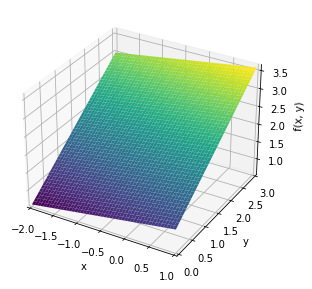

In [21]:
plot3d(p1(x,y),(x,xmin,xmax),(y,ymin,ymax));

### Interpolación sobre un simplex en $\mathbb{P}_2(x,y)$

In [22]:
VV = [[0, 0], [1, 1], [-2, 3]]
WW = [1, 2, 3, 1.3, 2.6, 2.4]

In [23]:
# Añadimos ahora los puntos medios de los tres lados del triángulo
VV.append([(V[0][0] + V[1][0])/S(2),(V[0][1] + V[1][1])/S(2)])
VV.append([(V[1][0] + V[2][0])/S(2),(V[1][1] + V[2][1])/S(2)])
VV.append([(V[2][0] + V[0][0])/S(2),(V[2][1] + V[0][1])/S(2)])
VV

[[0, 0], [1, 1], [-2, 3], [1/2, 1/2], [-1/2, 2], [-1, 3/2]]

In [24]:
len(VV)

6

In [25]:
# A continuación definimos las rectas que se anulan sobre cada lado:

x, y = symbols('x, y')

r0 = recta(VV[1],VV[2]) 
r1 = recta(VV[0],VV[2]) 
r2 = recta(VV[0],VV[1])

r01 = recta(VV[4],VV[5])
r12 = recta(VV[3],VV[5])
r02 = recta(VV[3],VV[4])

In [26]:
r0, r1, r2

(-2*x - 3*y + 5, -3*x - 2*y, -x + y)

In [27]:
r01, r12, r02

(x/2 - y/2 + 5/4, -x - 3*y/2 + 5/4, -3*x/2 - y + 5/4)

In [28]:
# A continuación definimos los correspondientes polinomios de Lagrange:

def l0(x_,y_):
    return r0.subs({x:x_,y:y_})*r12.subs({x:x_,y:y_})/(r0.subs({x:VV[0][0],y:VV[0][1]})*r12.subs({x:VV[0][0],y:VV[0][1]}))
def l1(x_,y_):
    return r1.subs({x:x_,y:y_})*r02.subs({x:x_,y:y_})/(r1.subs({x:VV[1][0],y:VV[1][1]})*r02.subs({x:VV[1][0],y:VV[1][1]}))
def l2(x_,y_):
    return r2.subs({x:x_,y:y_})*r01.subs({x:x_,y:y_})/(r2.subs({x:VV[2][0],y:VV[2][1]})*r01.subs({x:VV[2][0],y:VV[2][1]}))

def l01(x_,y_):
    return r0.subs({x:x_,y:y_})*r1.subs({x:x_,y:y_})/(r0.subs({x:VV[3][0],y:VV[3][1]})*r1.subs({x:VV[3][0],y:VV[3][1]}))
def l12(x_,y_):
    return r1.subs({x:x_,y:y_})*r2.subs({x:x_,y:y_})/(r1.subs({x:VV[4][0],y:VV[4][1]})*r2.subs({x:VV[4][0],y:VV[4][1]}))
def l02(x_,y_):
    return r0.subs({x:x_,y:y_})*r2.subs({x:x_,y:y_})/(r0.subs({x:VV[5][0],y:VV[5][1]})*r2.subs({x:VV[5][0],y:VV[5][1]}))

In [29]:
l02(x,y)

4*(-x + y)*(-2*x - 3*y + 5)/25

In [30]:
# Y finalmente definimos el polinomio de Lagrange que interpola los datos w en este triángulo

def p2(x, y):
    return WW[0]*l0(x, y) + WW[1]*l1(x, y) + WW[2]*l2(x, y) + WW[3]*l01(x, y) + WW[4]*l12(x, y) + WW[5]*l02(x, y)  

p2(x,y)

-0.416*(-3*x - 2*y)*(-x + y) - 0.208*(-3*x - 2*y)*(-2*x - 3*y + 5) + 8*(-3*x - 2*y)*(-3*x/2 - y + 5/4)/25 + 0.384*(-x + y)*(-2*x - 3*y + 5) - 12*(-x + y)*(x/2 - y/2 + 5/4)/25 + 4*(-2*x - 3*y + 5)*(-x - 3*y/2 + 5/4)/25

In [31]:
p2(x,y).expand()

0.271999999999999*x**2 + 0.496*x*y - 0.6*x + 0.0319999999999998*y**2 + 0.8*y + 1

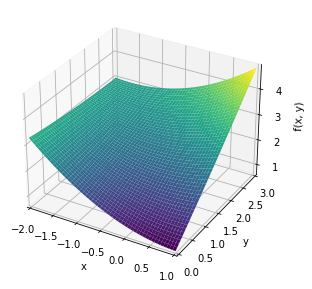

In [32]:
plot3d(p2(x,y),(x,xmin,xmax),(y,ymin,ymax));

# Interpolación en $\mathbb{Q}_{n,m}(x,y)$ sobre redes rectangulares

Una **red rectangular** de lados paralelos a los ejes de
coordenadas es una distribución de puntos (o nodos) del tipo $\left\{
\left(  x_{i},y_{j}\right)  \right\}  _{\substack{0\leq i\leq
n\\0\leq j\leq m}}$,  con $x_{0}<x_{1}<\cdots<x_{n}$ e
$y_{0}<y_{1}<\cdots<y_{m}$.

Los espacios de polinomios $\mathbb{Q}_{n,m}\left(  x,y\right)  $
son adecuados para interpolar datos lagrangianos sobre los nodos
en este tipo de redes. Concretamente, para la red anterior es
adecuado $\mathbb{Q}_{6,3}\left(  x,y\right)$.

Los correspondientes **polinomios de Lagrange** (que valen $1$ en un
punto de la red y $0$ en todos los demás) son fáciles de
obtener. La función $x-x_{r}$ se anula en todos los puntos de la red cuya
primera coordenada sea $x_{r}$ y la función $y-y_{s}$ se anula en todos
los puntos de la red cuya segunda coordenada valga $y_{s}$. Usando
productos de funciones de este tipo podemos conseguir los polinomios fundamentales de Lagrange.

Por ejemplo el $l_{01}$, correspondiente al nodo $\left(x_{0},y_{1}\right)$ es

$$
l_{01}\left(  x,y\right)  =\frac{\left(  x-x_{1}\right)  \cdots\left(
x-x_{7}\right)  \left(  y-y_{0}\right)  \left(  y-y_{2}\right)  \cdots\left(
y-y_{4}\right)  }{\left(  x_{0}-x_{1}\right)  \cdots\left(  x_{0}%
-x_{7}\right)  \left(  y_{1}-y_{0}\right)  \cdots\left(  y_{1}-y_{4}\right)
}.
$$

Y, en general, el polinomio $q_{n,m}\in\mathbb{Q}_{n,m}\left(x,y\right)$
que en los nodos $\left(  x_{i},y_{j}\right)$ de la red toma los valores
$w_{i,j}$ es

$$
q_{n,m}\left(  x,y\right)  =\sum_{\substack{0\leq i\leq n\\0\leq
j\leq m}}w_{i,j}l_{i,j}\left(  x,y\right)  ,
$$

donde $l_{i,j}\left(  x,y\right)  =\prod
\limits_{\substack{r=0\\r\neq i}}^{n}\dfrac{x-x_{r}}{x_{i}-x_{r}}%
\prod\limits_{\substack{s=0\\s\neq j}}^{m}\dfrac{y-y_{s}}{y_{j}-y_{s}}.$

Por ejemplo, el polinomio de $q_{21}\in\mathbb{Q}_{21}(x,y)$ que en los puntos
$\left(  -1,0\right)  $, $\left(  0,0\right)  $, $\left(  1,0\right)  $,
$\left(  -1,1\right)  $, $\left(  0,1\right)  $ y $\left(  1,1\right)  $ toma
los valores $1.5$, $0$, $0$, $0$, $0$ y $3$, respectivamente, es

$$
q_{21}(x,y)=1.5\,\frac{x(x-1)(y-1)}{-2}+3\,\frac{x(x+1)y}{2}=\frac{3}{4}%
x^{2}y+\frac{3}{4}x^{2}+\frac{9}{4}xy-\frac{3}{4}x
$$

**Ejercicio:** Comprobad dichas cuentas, ya sea a mano o bien con la ayuda de Python.

Consideremos ahora el rectángulo $[0,5]\times[0,5]$, subdividimos los segmentos que lo definen en 5 partes iguales y definimos la función $sen(\frac{1}{2 \pi} x y)$.

In [33]:
a = 0.; b = 5.; n = 5
c = 0.; d = 5.; m = 5

x, y = symbols('x, y')
def f(x_,y_):
    return sin(x_*y_/(2*pi))

In [34]:
f(x,y)

sin(x*y/(2*pi))

In [35]:
u, v = symbols('u, v')
f(u,v)

sin(u*v/(2*pi))

In [36]:
v

v

Vamos a interpolarla en $\mathbb{Q}_{5,5}(x,y)$, para lo cuál generaremos una red uniforme de nodos de interpolación:

In [37]:
hx = (b - a)/n
xx = [a + i*hx for i in range(n+1)]
hy = (d - c)/m
yy = [c + j*hy for j in range(m+1)];
W = [[N(f(xx[i], yy[j])) for j in range(m+1)] for i in range(n+1)]

In [38]:
# Esta sería la red (o malla) de nodos producidos:
W

[[0, 0, 0, 0, 0, 0],
 [0,
  0.158483886591605,
  0.312961796207787,
  0.459529010441881,
  0.594480768524822,
  0.714405912090294],
 [0,
  0.312961796207787,
  0.594480768524822,
  0.816273108589421,
  0.956055657327630,
  0.999784662063456],
 [0,
  0.459529010441881,
  0.816273108589421,
  0.990437743921515,
  0.943066732256947,
  0.684755759980251],
 [0,
  0.594480768524822,
  0.956055657327630,
  0.943066732256947,
  0.560602798839214,
  -0.0414942916985866],
 [0,
  0.714405912090294,
  0.999784662063456,
  0.684755759980251,
  -0.0414942916985866,
  -0.742825487149853]]

In [39]:
[[(xx[i],yy[j]) for j in range(m+1)] for i in range(n+1)] 

[[(0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (0.0, 3.0), (0.0, 4.0), (0.0, 5.0)],
 [(1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 3.0), (1.0, 4.0), (1.0, 5.0)],
 [(2.0, 0.0), (2.0, 1.0), (2.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0)],
 [(3.0, 0.0), (3.0, 1.0), (3.0, 2.0), (3.0, 3.0), (3.0, 4.0), (3.0, 5.0)],
 [(4.0, 0.0), (4.0, 1.0), (4.0, 2.0), (4.0, 3.0), (4.0, 4.0), (4.0, 5.0)],
 [(5.0, 0.0), (5.0, 1.0), (5.0, 2.0), (5.0, 3.0), (5.0, 4.0), (5.0, 5.0)]]

In [40]:
# Y los polinomios fundamentales de Lagrange: 
x, y = symbols('x, y')

i = n
prod([(x-xx[r])/(xx[i]-xx[r]) for r in range(i)] + [(x-xx[r])/(xx[i]-xx[r]) for r in range(i+1,n+1)])

0.2*x*(0.25*x - 0.25)*(0.333333333333333*x - 0.666666666666667)*(0.5*x - 1.5)*(1.0*x - 4.0)

In [41]:
j = m
prod([(y-yy[s])/(yy[j]-yy[s]) for s in range(j)] + [(y-yy[s])/(yy[j]-yy[s]) for s in range(j+1,m+1)])

0.2*y*(0.25*y - 0.25)*(0.333333333333333*y - 0.666666666666667)*(0.5*y - 1.5)*(1.0*y - 4.0)

In [42]:
def qx(i):
    return prod([(x-xx[r])/(xx[i]-xx[r]) for r in range(i)] + [(x-xx[r])/(xx[i]-xx[r]) for r in range(i+1,n+1)])

In [43]:
def qy(j):
    return prod([(y-yy[s])/(yy[j]-yy[s]) for s in range(j)] + [(y-yy[s])/(yy[j]-yy[s]) for s in range(j+1,m+1)])

In [44]:
# Y los polinomios fundamentales de Lagrange: 

def qx(i):
    return prod([(x-xx[r])/(xx[i]-xx[r]) for r in range(i)] + [(x-xx[r])/(xx[i]-xx[r]) for r in range(i+1,n+1)])

def qy(j):
    return prod([(y-yy[s])/(yy[j]-yy[s]) for s in range(j)] + [(y-yy[s])/(yy[j]-yy[s]) for s in range(j+1,m+1)])

def q(i,j): 
    return qx(i)*qy(j)

In [45]:
pol = sum([sum([W[i][j]*q(i,j) for j in range(m+1)]) for i in range(n+1)]).simplify()

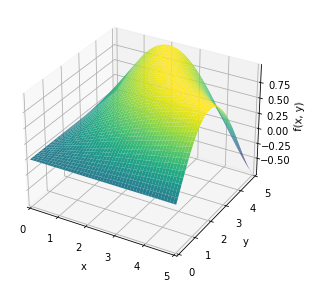

In [46]:
plot3d(pol,(x,a,b),(y,c,d));

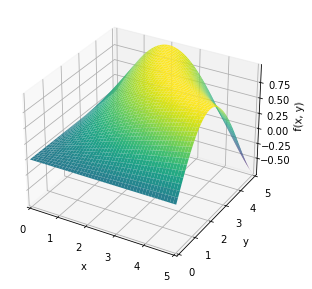

In [47]:
plot3d(f(x,y),(x,a,b),(y,c,d));

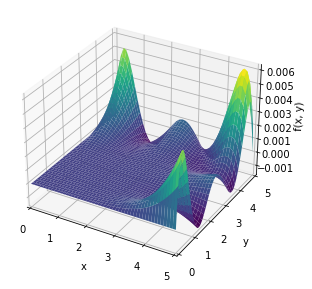

In [48]:
plot3d(f(x,y)-pol,(x,a,b),(y,c,d));

## Interpolación en $\mathbb{Q}_{1}(x,y)$

Si el rectángulo es $[0,3]\times[1,5]$ y los datos que se van a interpolar son 1, 0, -1 y 2 en los vértices del mismo, entonces la interpolación tendrá lugar en $\mathbb{Q}_{1}(x,y)$, y el interpolante y su gráfica se obtienen de la siguiente manera (nótese que como se había definido el interpolante mediante una asignación diferida, sólo debemos especificar los nuevos datos del problema).

In [49]:
a = 0.; b = 3.;
n = 1;
c = 1.; d = 5.;
m = 1;
hx = (b - a)/n
xx = [a + i*hx for i in range(n+1)]
hy = (d - c)/m
yy = [c + j*hy for j in range(m+1)]
W = [[1, 0], [-1, 2]]

In [50]:
W[0][0]

1

In [51]:
qy(0)

1.25 - 0.25*y

In [52]:
q(1,1)

0.333333333333333*x*(0.25*y - 0.25)

In [53]:
pol = sum([sum([W[i][j]*q(i,j) for j in range(m+1)]) for i in range(n+1)]).simplify()

In [54]:
pol

0.333333333333333*x*y - 1.0*x - 0.25*y + 1.25

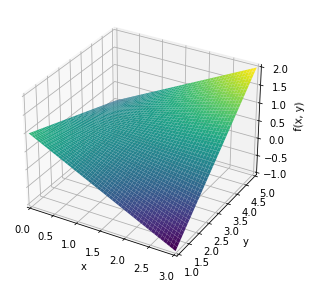

In [55]:
# Representamos ahora la gráfica del interpolante construido.
plot3d(pol,(x,a,b),(y,c,d));
# Se trata de una superficie es reglada, es decir, está constituida por líneas rectas a lo largo de los ejes.

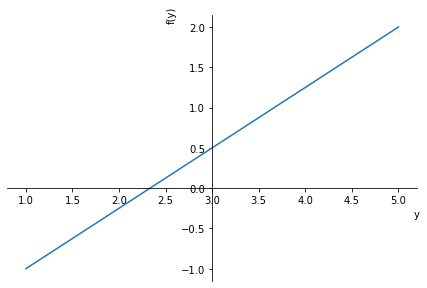

In [56]:
# comprobémoslo ahora para algunos valores concretos de x
plot(pol.subs({x: 3}),(y,c,d));

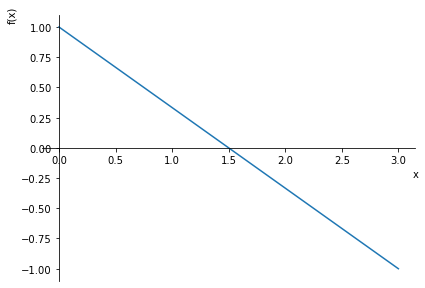

In [57]:
# comprobémoslo también para algunos valores concretos de y
plot(pol.subs({y: 1}),(x,a,b));

## Interpolación en $\mathbb{Q}_{2}(x,y)$

Si el rectángulo es ahora $[0,2]\times[0,6]$ y los datos que se van a interpolar son 4, 0, 3, 3, 5, 3, 2, 0 y 3  en una malla 2$\times$2 de dicho rectángulo, entonces la interpolación tendrá lugar en $\mathbb{Q}_{2}(x,y)$, y el interpolante y su gráfica se obtienen de la siguiente manera(nótese que como se había definido el interpolante mediante una asignación diferida, sólo debemos especificar los nuevos datos del problema).

In [58]:
a = 0.; b = 2.;
n = 2;
c = 0.; d = 6.;
m = 2;
hx = (b - a)/n;
xx = [a + i*hx for i in range(n+1)];
hy = (d - c)/m;
yy = [c + j*hy for j in range(m+1)];

In [59]:
W = [[4,0,3], [3,5,3], [2,0,3]]

In [60]:
pol = sum([sum([W[i][j]*q(i,j) for j in range(m+1)]) for i in range(n+1)]).simplify()

In [61]:
pol

0.555555555555556*x**2*y**2 - 3.33333333333333*x**2*y - 1.16666666666667*x*y**2 + 7.16666666666667*x*y - 1.0*x + 0.388888888888889*y**2 - 2.5*y + 4.0

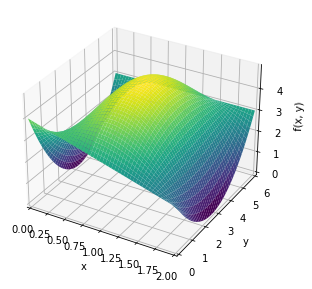

In [62]:
# Representamos ahora la gráfica del interpolante construido.
plot3d(pol,(x,a,b),(y,c,d));

Cuando nos movemos por paralelas a los ejes se describen líneas parabólicas. 

**Ejercicio:** En la gráfica anterior, ¿cuál de ellas puede asegurarse que es una recta?

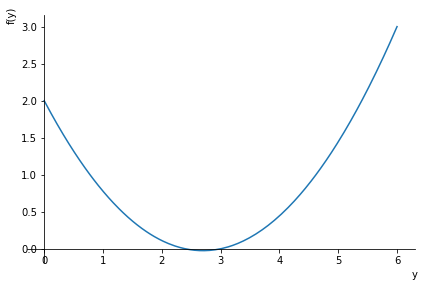

In [63]:
# comprobémoslo ahora para algunos valores concretos de x
plot(pol.subs({x: 2}),(y,c,d));   # bastaría con ir cambiando el valor de x

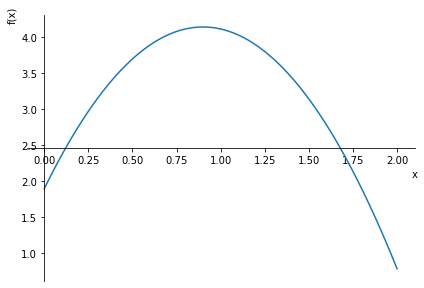

In [64]:
# comprobémoslo ahora para algunos valores concretos de y
plot(pol.subs({y: 1}),(x,a,b));   # bastaría con ir cambiando el valor de y

# Continuidad de los interpolantes a trozos

Se ha demostrado que los interpolantes obtenidos sobre símplices y rectángulos en los espacios citados anteriormente producen una función que globalmente es, al menos, continua sobre toda una región en la que se ha efectuado una partición utilizando alguno de estos elementos geométricos. Vamos a mostrar este hecho de forma gráfica para una región formada por dos rectángulos adyacentes en los que se interpola una función en $\mathbb{Q}_{1}(x,y)$.

In [65]:
def f1(x_, y_) :
    return sin(x_**2 - y_**2)**2

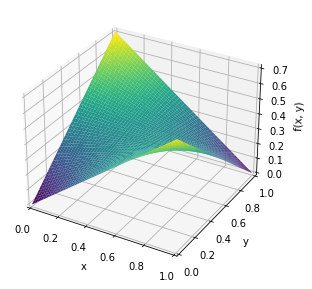

In [66]:
a = 0.; b = 1.
n = 1
c = 0.; d = 1.;
m = 1;
hx = (b - a)/n;
xx = [a + i*hx for i in range(n+1)]
hy = (d - c)/m;
yy = [c + j*hy for j in range(m+1)]
W = [[f1(xx[i], yy[j]) for i in range(n + 1)] for j in range(m + 1)]
pol1 = sum([sum([W[i][j]*q(i,j) for j in range(m+1)]) for i in range(n+1)]).simplify()
graf1 = plot3d(pol1, (x, a, b), (y, c, d));

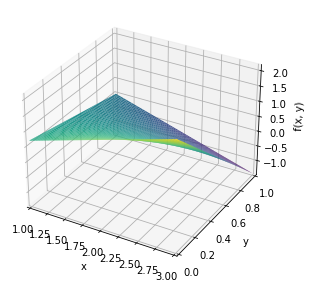

In [67]:
a = 1.; b = 3.;
n = 1;
c = 0.; d = 1.;
m = 1;
hx = (b - a)/n;
xx = [a + i*hx for i in range(n+1)]
hy = (d - c)/m;
yy = [c + j*hy for j in range(m+1)]
W = [[f1(xx[i], yy[j]) for i in range(n + 1)] for j in range(m + 1)]
pol2 = sum([sum([W[i][j]*q(i,j) for j in range(m+1)]) for i in range(n+1)]).simplify()
graf2 = plot3d(pol1, (x, a, b), (y, c, d));

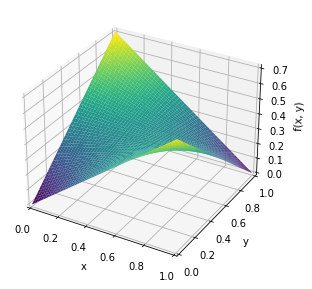

In [68]:
graf1.show();

In [69]:
graf1.extend(graf2)

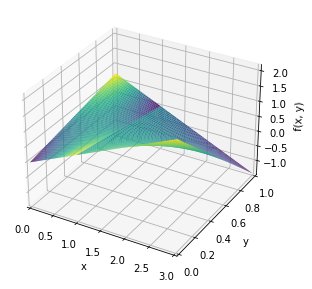

In [70]:
graf1.show()

#  Derivación e integración numérica en 2 variables

## Fórmulas de derivación numérica de tipo interpolatorio

Lo mismo que ocurría en una variable, la interpolación en dos variables es fundamental para obtener fórmulas que permitan aproximar una derivada en un punto o una integral en una región. A tales fórmulas se les denomina de tipo interpolatorio.
Las regiones más cómodas son las de tipo rectangular (tanto para definir intregrales como para establecer derivadas en las direcciones de los ejes). Por tanto, los espacios más cómodos para trabajar son los de tipo $\mathbb{Q}_{n,m}(x,y)$ que justo estamos viendo.

Vamos a aproximar, por ejemplo, la derivada segunda cruzada en un punto $(a,b)$, a partir de interpolación en los vértices de un rectángulo que tiene por centro el punto $(a,b)$. Notaremos estos cuatro vértices como  $(a-h,b-k), (a-h,b+k), (a+h,b-k)$ y $(a+h,b+k)$. Otras fórmulas podrían obtenerse de igual forma. Tan solo debemos escribir las listas correspondienes a los nodos en $x$, los nodos en $y$ y los valores de $W$ correspondientes y volver a la interpolación en $\mathbb{Q}_{1}(x,y)$ para obtener el polinomio que debemos derivar (respecto a las variables $x$ e $y$), para después sustituir en $(a,b)$, aunque al ser constante la derivada (en este caso) no sería necesario realizar dicha sustitución en este caso, pero sí en otros casos más generales.

In [71]:
# Para obtener una fórmula genérica, para cualquier rectángulo
# necesitaremos que sus vértices vengan dados por variables simbólicas
a, b, c, d = symbols('a, b, c, d')
h, k = symbols('h, k')
# e igualmente también tendremos que trabajar con una función genérica
f = Function('f')
n = 1; m = 1;
xx = [a - h, a + h];
yy = [b - k, b + k];
W = [[f(xx[i], yy[j])  for j in range(m + 1)] for i in range(n + 1)];
pol = sum([sum([W[i][j]*q(i,j) for j in range(m+1)]) for i in range(n+1)]).simplify()

In [72]:
pol.simplify()

((-a + h + x)*(-b + k + y)*f(a + h, b + k) + (-a + h + x)*(b + k - y)*f(a + h, b - k) + (a + h - x)*(-b + k + y)*f(a - h, b + k) + (a + h - x)*(b + k - y)*f(a - h, b - k))/(4*h*k)

In [73]:
# Podemos comprobar que está correcta la interpolación en los 4 vértices
pol.subs({x:a-h, y:b-k}).simplify(), pol.subs({x:a-h, y:b+k}).simplify(), pol.subs({x:a+h, y:b-k}).simplify(), pol.subs({x:a+h, y:b+k}).simplify()

(f(a - h, b - k), f(a - h, b + k), f(a + h, b - k), f(a + h, b + k))

In [74]:
# La fórmula de derivación numérica se obtendrá pues derivando el polinomio obtenido más arriba.
fxy = diff(diff(pol,x),y)
fxy

(f(a - h, b - k) - f(a - h, b + k) - f(a + h, b - k) + f(a + h, b + k))/(4*h*k)

In [75]:
print(fxy)

(f(a - h, b - k) - f(a - h, b + k) - f(a + h, b - k) + f(a + h, b + k))/(4*h*k)


Puede comprobar que la derivada segunda cruzada, con la fórmula obtenida, vale cero cuando f es una de las funciones 1, x, y. Y vale uno para la función x y, como era de esperar, ya que la fórmula debe ser exacta para cualquier base del espacio interpolador. 

In [76]:
def formula(f):
    return (f(a - h, b - k) - f(a - h, b + k) - f(a + h, b - k) + f(a + h, b + k))/(4*h*k)

In [77]:
g = Function('g')
formula(g)

(g(a - h, b - k) - g(a - h, b + k) - g(a + h, b - k) + g(a + h, b + k))/(4*h*k)

In [78]:
x, y  = symbols('x,y')
[[(formula(lambda x,y: x**i*y**j)-diff(diff(x**i*y**j,x),y).subs({x:a,y:b})).simplify() for i in range(4)] for j in range(4)]

[[0, 0, 0, 0],
 [0, 0, 0, h**2],
 [0, 0, 0, 2*b*h**2],
 [0, k**2, 2*a*k**2, 3*a**2*k**2 + 3*b**2*h**2 + h**2*k**2]]

Lo mismo ocurrirá con la fórmula de integración numérica que vamos a obtener a continuación. La región de integración será la determinada por el propio rectángulo.

## Fórmulas de integración numérica de tipo interpolatorio

Escribimos, en primer lugar, las coordenadas de los vértices del rectángulo en el que vamos a integrar. Después calculamos el polinomio de interpolación de grado menor o igual que 1 en cada variable que interpola estos vértices y, por último, integramos sobre el rectángulo considerado, el polinomio de interpolación obtenido.

In [79]:
pol

((-a + h + x)*(-b + k + y)*f(a + h, b + k) + (-a + h + x)*(b + k - y)*f(a + h, b - k) + (a + h - x)*(-b + k + y)*f(a - h, b + k) + (a + h - x)*(b + k - y)*f(a - h, b - k))/(4*h*k)

In [80]:
pol.subs({x:a+h, y:b+k}).simplify()  # comprobaciones varias

f(a + h, b + k)

In [81]:
# Se podrían realizar integrales simples en alguna de las dos variables
integrate(pol,[x,a-h,a+h]).simplify()  # primero en x, por ejemplo

h*(b*f(a - h, b - k) - b*f(a - h, b + k) + b*f(a + h, b - k) - b*f(a + h, b + k) + k*f(a - h, b - k) + k*f(a - h, b + k) + k*f(a + h, b - k) + k*f(a + h, b + k) - y*f(a - h, b - k) + y*f(a - h, b + k) - y*f(a + h, b - k) + y*f(a + h, b + k))/(2*k)

In [82]:
# y después en la variable y, 
integrate(_,[y,b-k,b+k]).simplify()
# aunque por el teorema de Fubini, hubiera sido indiferente el orden

h*k*(f(a - h, b - k) + f(a - h, b + k) + f(a + h, b - k) + f(a + h, b + k))

In [83]:
# En cualquier caso equivaldría a calcular la integral exacta de dicho 
# polinomio de interpolación de dos variables en el recinto rectangular 
# determinado por los cuatro vértices:
# (a-h,b-k), (a-h,b+k), (a+h,b+k) y (a-h,b+k)
integrate(integrate(pol,[x,a-h,a+h]),[y,b-k,b+k]).simplify()

h*k*(f(a - h, b - k) + f(a - h, b + k) + f(a + h, b - k) + f(a + h, b + k))

In [84]:
print(_)

h*k*(f(a - h, b - k) + f(a - h, b + k) + f(a + h, b - k) + f(a + h, b + k))


Este resultado se puede considerar el producto de dos factores: uno de ellos sería el área del rectángulo en sí $(2h)(2k)=4 hk$;  mientras que el otro factor representa la media aritmética del valor de la función en los 4 vértices: $$\frac{1}{4}(f(a - h, b - k) + f(a - h, b + k) + f(a + h, b - k) + f(a + h, b + k)).$$

La fórmula obtenida es pues la generalización de la fórmula del trapecio en el caso de dos variables independientes. Y como también se ha visto, se obtiene también aplicando dicha fórmula al integrar con respecto a cada una de las variables:

$$\int_{a-h}^{a+h} \int_{b-k}^{b+k} f(x,y) \; dy \;dx $$
$$\approx
\int_{a-h}^{a+h} (b+k-(b-k))\frac{f(x,b+k)+f(x,b-k)}{2} \; dx $$
$$ =  k\, \int_{a-h}^{a+h} \left(f(x,b+k)+f(x,b-k)\right) \; dx $$
$$=  k\, \left(\int_{a-h}^{a+h} f(x,b+k) \; dx + \int_{a-h}^{a+h} f(x,b-k) \; dx\right)
$$
$$
= k\,(2h)\left( \frac{f(a+h,b+k)+f(a-h,b+k)}{2} + \frac{f(a+h,b-k)+f(a-h,b-k)}{2}  \right)
$$
$$
= h\, k \left( f(a+h,b+k)+f(a-h,b+k) + f(a+h,b-k)+f(a-h,b-k)
\right)
$$

Obtenemos ahora la fórmula de integración, similar a Simpson para una variable, que usa 
9 nodos distribuidos en una red de 3$\times$3, unisolvente en $\mathbb{Q}_{2}(x,y)$.
Si no damos valores particulares a algunos parámetros el cálculo simbólico puede alargarse demasiado. Por tanto suponemos que un vértice es el origen de coordenadas.

In [85]:
a,b,c,d

(a, b, c, d)

In [86]:
n = 2; m = 2;
# a = 0; c = 0;
a, c = symbols('a, c')
xx = [a, (a + b)/2, b];
yy = [c, (c + d)/2, d];
W = [[f(xx[i], yy[j]) for j in range(m + 1)] for i in range(n + 1)];
pol = sum([sum([W[i][j]*q(i,j) for j in range(m+1)]) for i in range(n+1)]).simplify()

In [87]:
pol.simplify()

(16*(a - x)*(b - x)*(c - y)*(d - y)*f(a/2 + b/2, c/2 + d/2) - 4*(a - x)*(b - x)*(c - y)*(c + d - 2*y)*f(a/2 + b/2, d) - 4*(a - x)*(b - x)*(d - y)*(c + d - 2*y)*f(a/2 + b/2, c) - 4*(a - x)*(c - y)*(d - y)*(a + b - 2*x)*f(b, c/2 + d/2) + (a - x)*(c - y)*(a + b - 2*x)*(c + d - 2*y)*f(b, d) + (a - x)*(d - y)*(a + b - 2*x)*(c + d - 2*y)*f(b, c) - 4*(b - x)*(c - y)*(d - y)*(a + b - 2*x)*f(a, c/2 + d/2) + (b - x)*(c - y)*(a + b - 2*x)*(c + d - 2*y)*f(a, d) + (b - x)*(d - y)*(a + b - 2*x)*(c + d - 2*y)*f(a, c))/((a - b)**2*(c - d)**2)

In [88]:
intdoble = integrate(integrate(pol,[x,a,b]), [y,c,d])

In [89]:
intdoble.factor()

(a - b)*(c - d)*(f(a, c) + f(a, d) + 4*f(a, c/2 + d/2) + f(b, c) + f(b, d) + 4*f(b, c/2 + d/2) + 4*f(a/2 + b/2, c) + 4*f(a/2 + b/2, d) + 16*f(a/2 + b/2, c/2 + d/2))/36

Obsérvese que $(b-a)(d-c)$ es el área del rectángulo, y que los coeficientes de los demás puntos del rectángulo son los que se obtendrían al aplicar Simpson primero para una variable y después para la otra (igual que pasaba anteriormente con la fórmula del trapecio en dos variables).

Nótese que también se podría recuperar la fórmula de Simpson para una sola variable, si particularizamos $f(x,y)$ para un valor concreto de la segunda variable ($y=1$ por ejemplo), y consideramos también un rectángulo concreto de altura 1 en esta segunda variable, como sigue: 

In [90]:
pol1x = pol.subs({c:0, d:1, y:1}).simplify()

In [91]:
integrate(pol1x,[x,a,b]).factor()

-(a - b)*(f(a, 1) + f(b, 1) + 4*f(a/2 + b/2, 1))/6

obteniendo así la correspondiente fórmula de Simpson para una integral en la variable $x$
$$
\int_a^b f(x)\, dx \approx \frac{b-a}{6}\left( f(a)+4f(\frac{a+b}{2}) +f(b) \right)
$$

# Ejercicios

1.- En cada uno de los 2 cuadrados de la red de puntos $(0,0), (0,1), (0,2), (1,0), (1,1)$ y $(1,2)$ interpole en  $\mathbb{Q}_{1}(x,y)$ la función $5 x^2+3 y^2+x y+1/10 3x^2(1+y^2)$. Represente conjuntamente los interpolantes obtenidas.

2.- Tome $h=k$ para hallar aproximaciones de la segunda derivada cruzada de la función del ejercicio anterior en el punto $(1.4,2.3)$ para los valores de $h$ iguales a $10^{-j}, \; j=1,2,3,4,5$. Imprima las 5 aproximaciones y los errores relativos a cada una de ellas.

3.- Aproxime la superficie esférica correspondiente a $\sqrt{9-x^2-y^2}$ en el rectángulo de vértices opuestos $(-2,0)$ y $(2,2)$ mediante dos interpolaciones en $\mathbb{Q}_{1}(x,y)$ en los cuadrados obtenidos al dividir en dos partes dicho rectángulo. Dibuje el correspondiente spline obtenido.